In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [47]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [48]:
df.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


In [49]:
# preprocess the data
df.drop('deck',axis=1,inplace=True)
df['age'].fillna(df['age'].median(),inplace=True)
df['fare'].fillna(df['fare'].median(),inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)
# encode categorical variables using loop
for col in df.columns:
  if(df[col].dtype=='object' or df[col].dtype=='category'):
    df[col]=LabelEncoder().fit_transform(df[col])
df.head()

<ipython-input-49-a2053377b841>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)
<ipython-input-49-a2053377b841>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [51]:
x=df.drop(['survived','alive'], axis=1)
y=df['survived']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [53]:
model=LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
y_pred=model.predict(x_test)

In [55]:
print('Acuuracy Score: ',accuracy_score(y_test, y_pred))
print('Recall Score: ',recall_score(y_test, y_pred))
print('Precision Score: ',precision_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test, y_pred))

Acuuracy Score:  0.776536312849162
Recall Score:  0.7166666666666667
Precision Score:  0.6515151515151515
F1 Score:  0.6825396825396826
Confusion Matrix: 
 [[96 23]
 [17 43]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       119
           1       0.65      0.72      0.68        60

    accuracy                           0.78       179
   macro avg       0.75      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



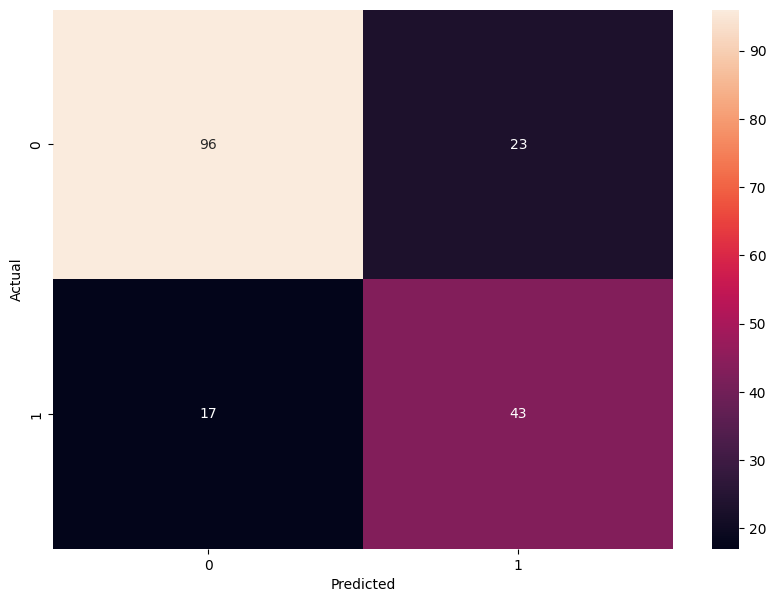

In [56]:
# plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()